In [1]:
from sklearn import datasets
import numpy as np
import math
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.decomposition import PCA
import seaborn as sns

from generator import CategoricalClassification

## Creating simple datasets 

In [2]:
cc = CategoricalClassification()

In [35]:
#Creates a simple dataset of 10 features, 10k samples, with feature cardinality of all features being 35
X = cc.generate_data(9, 
                     10000, 
                     cardinality=35, 
                     ensure_rep=True, 
                     random_values=True, 
                     low=0, 
                     high=40)


xT = X.T

value_sets = []
value_counts = []
for feature in xT:
    unique, count = np.unique(feature, return_counts=True)
    value_sets.append(unique)
    value_counts.append(count)
    
print(X.shape)    
for  i in range(9):
    print(len(value_sets[i]), end=' ')

(10000, 9)
35 35 35 35 35 35 35 35 35 

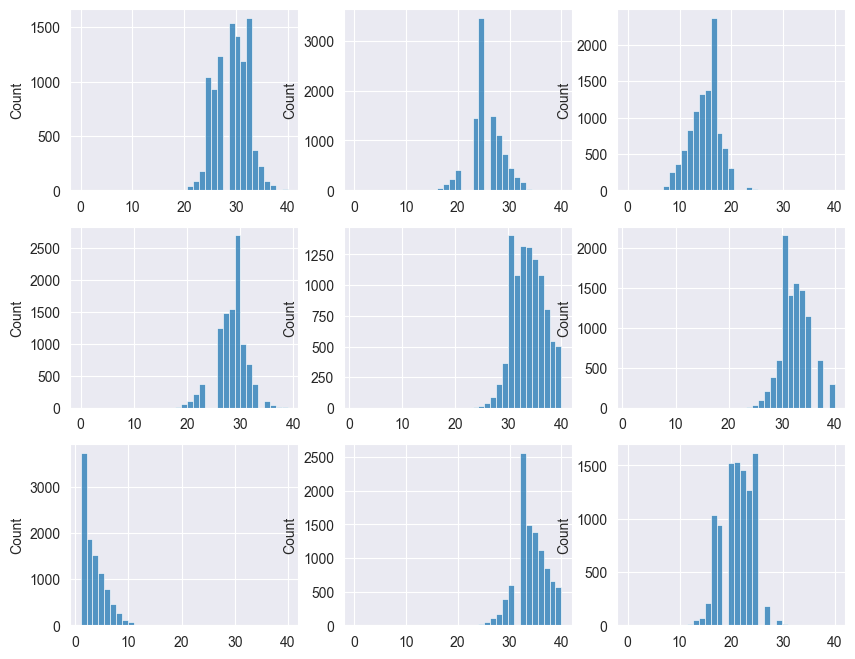

In [39]:
fig, axes = plt.subplots(3,3, figsize=(10, 8))

for i in range(9):
    x = int(i / 3)
    y = i % 3
    sns.histplot(xT[i], bins=len(value_sets[i]), ax=axes[x][y])
    
plt.show()
    

## Creating a more complex dataset with specific feature values and distributions

 We can pass specific structures in a structured list of tuples, where the first element represents the feature index or indexes, the second their attributes.

In [40]:
dataset_structure = [
    (0, [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.05, 0.05, 0.05, 0.15, 0.1, 0.15, 0.25, 0.05, 0.05, 0.1]]), # The attributes can be a pair of values and their probabilities 
    (1, [[2, 6, 7, 8], [20, 12, 55, 123]]), # Or a pair of values and their counts. The method ensures the count is represented as probabilities.
    ([3, 4, 5], [33, 55, 22, 66, 11, 44, 77, 99, 88]) # The first element can also be a list of feature indexes, and the second only a list of values - in which case the density will be normal.
]

In [45]:
# We will generate more features than in dataset structure. The additional features will use passed parameters - cardinality 3, value set [87, 88, 89]
X = cc.generate_data(9, 
                     1000,
                     cardinality=36,
                     structure=dataset_structure,   
                     ensure_rep=True,
                     low=87)

xT = X.T

value_sets = []
value_counts = []
for feature in xT:
    unique, count = np.unique(feature, return_counts=True)
    value_sets.append(unique)
    value_counts.append(count)
    
print(X.shape)    
for  i in range(9):
    print(len(value_sets[i]), end=' ')

(1000, 9)
10 4 36 9 9 9 36 36 36 

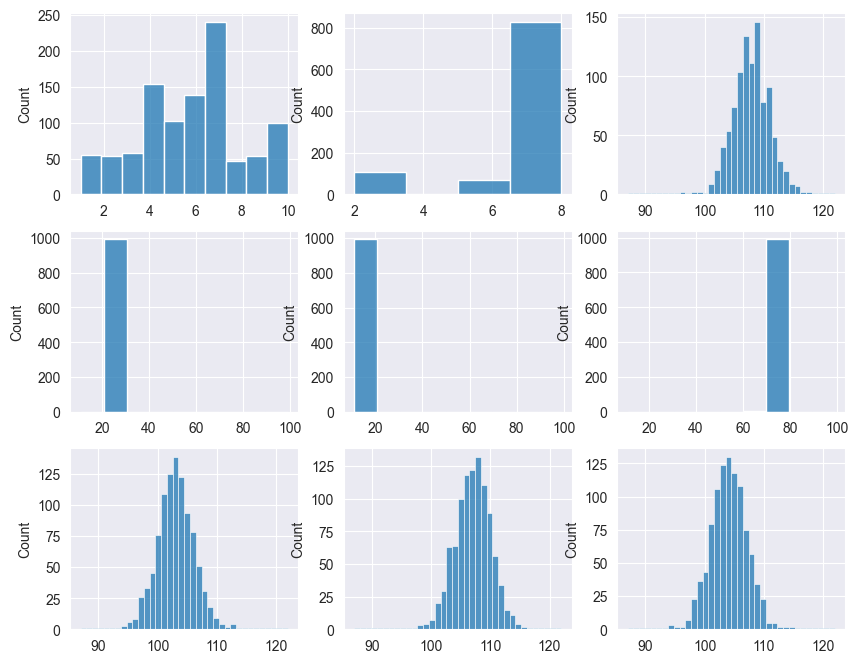

In [46]:
fig, axes = plt.subplots(3,3, figsize=(10, 8))

for i in range(9):
    x = int(i / 3)
    y = i % 3
    sns.histplot(xT[i], bins=len(np.unique(xT[i])), ax=axes[x][y])
    
plt.show()

## Simulating IRIS 

In [2]:
#Loading Scipy Iris dataset
iris = datasets.load_iris()
irisX = iris.data
irisY = iris.target

irisT = np.transpose(irisX)

#Iris feature set values & their respective probabilities
unique_val = []
val_prob = []
for feature in irisT:
    unique, count = np.unique(feature, return_counts=True)
    unique_val.append(unique)
    val_prob.append(count/150)

print(irisX.shape)

(150, 4)


In [3]:
cc = CategoricalClassification()

dataset_structure = [
        (0, [unique_val[0], val_prob[0]]), 
        (1, [unique_val[1], val_prob[1]]), 
        (2, [unique_val[2], val_prob[2]]),
        (3, [unique_val[3], val_prob[3]])
    ] 

X = cc.generate_data(4, 1500, structure=dataset_structure, ensure_rep=True, seed=42)
y = cc.generate_labels(X, n=3, class_relation='cluster')

values, counts = np.unique(y, return_counts=True)
print(len(y), values, counts)
print(X.shape)

X, y = cc.downsample_dataset(X, y, N=50)

print("After downsampling dataset:")
values, counts = np.unique(y, return_counts=True)
print(len(y), values, counts)
print(X.shape)

1500 [0 1 2] [963 235 302]
(1500, 4)
After downsampling dataset:
150 [0. 1. 2.] [50 50 50]
(150, 4)


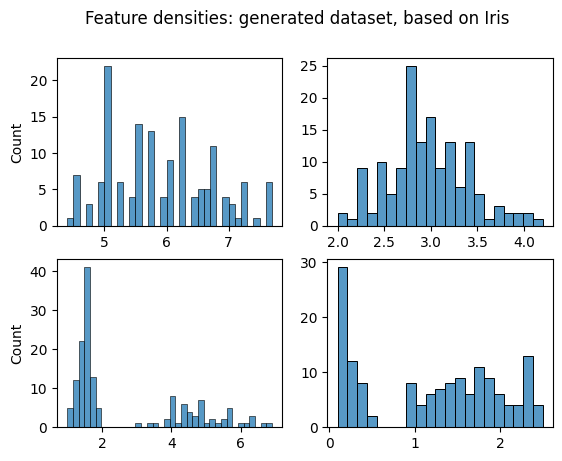

In [4]:
Xt = X.T
fig, axes = plt.subplots(2,2)
sns.histplot(Xt[0], bins=len(np.unique(Xt[0])), ax=axes[0][0])
sns.histplot(Xt[1], bins=len(np.unique(Xt[1])), ax=axes[0][1]).set(ylabel=None)
sns.histplot(Xt[2], bins=len(np.unique(Xt[2])), ax=axes[1][0])
sns.histplot(Xt[3], bins=len(np.unique(Xt[3])), ax=axes[1][1]).set(ylabel=None)

fig.suptitle("Feature densities: generated dataset, based on Iris")
plt.show()

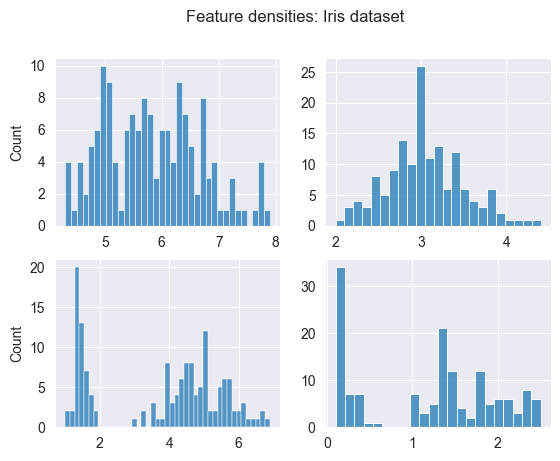

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2)

sns.histplot(irisT[0], bins=len(np.unique(irisT[0])), ax=axes[0][0])
sns.histplot(irisT[1], bins=len(np.unique(irisT[1])), ax=axes[0][1]).set(ylabel=None)
sns.histplot(irisT[2], bins=len(np.unique(irisT[2])), ax=axes[1][0])
sns.histplot(irisT[3], bins=len(np.unique(irisT[3])), ax=axes[1][1]).set(ylabel=None)


plt.suptitle("Feature densities: Iris dataset")
plt.show()

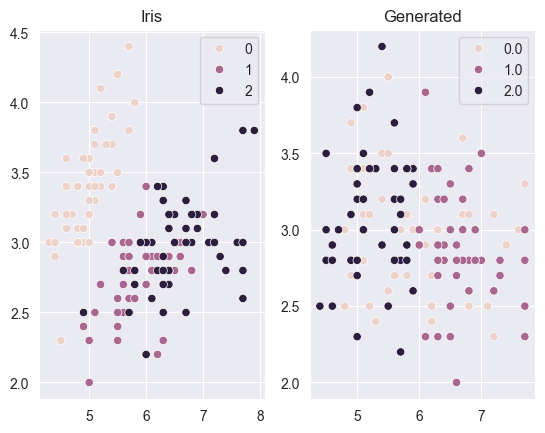

In [6]:
fig, axes = plt.subplots(1, 2)

sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], hue=iris.target, ax=axes[0])
axes[0].set_title("Iris")

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axes[1])
axes[1].set_title("Generated")

plt.show()

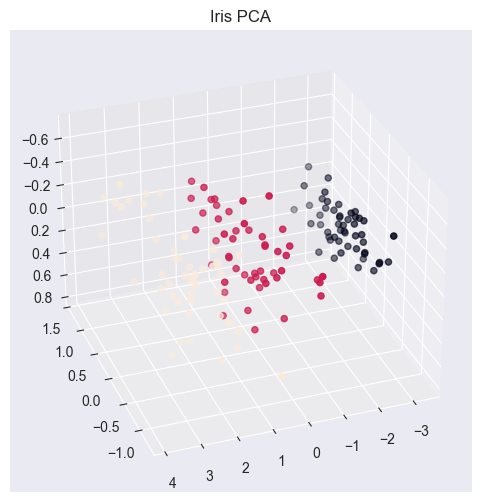

In [7]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=20,
)
ax.set_title("Iris PCA")
plt.show()

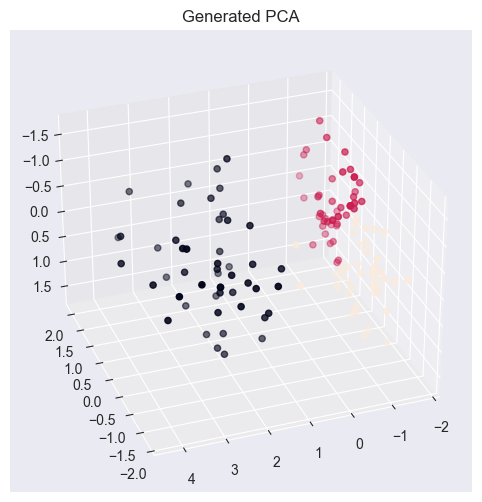

In [8]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    s=20,
)
ax.set_title("Generated PCA")
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
iX_train, iX_test, iy_train, iy_test = train_test_split(irisX, irisY, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Iris Classification Report:")
iRFC = RandomForestClassifier()
iRFC.fit(iX_train, iy_train)
iy_pred = iRFC.predict(iX_test)
print(classification_report(iy_test, iy_pred))

print("Generated Classification Report:")
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

Iris Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Generated Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Adding correlated features and combinations

In [11]:
from scipy.stats import pearsonr

In [12]:
#Adding three additional features, correlated to feature at ix 1 with correlation coef. 0.8, ix 3 with correlation coef. 0.8,
# and ix 0 with correlation coef. 0.2. Correlated features will therefore be in columns with ix 4, 5, 6

X = cc.generate_correlated(X, [1,3], r=0.8)
X = cc.generate_correlated(X, [0], r=0.2)
print(cc.dataset_info['correlations'])

[{'feature_indices': [1, 3], 'correlated_indices': array([4, 5]), 'correlation_factor': 0.8}, {'feature_indices': [0], 'correlated_indices': 6, 'correlation_factor': 0.2}]


In [13]:
Xt = X.T
corr, _ = pearsonr(Xt[1], Xt[4])
print("Pearson correlation, feature 1 and 4:", corr)
corr, _ = pearsonr(Xt[3], Xt[5])
print("Pearson correlation, feature 3 and 5:", corr)
corr, _ = pearsonr(Xt[0], Xt[6])
print("Pearson correlation, feature 0 and 6:", corr)

Pearson correlation, feature 1 and 4: 0.8
Pearson correlation, feature 3 and 5: 0.8000000000000003
Pearson correlation, feature 0 and 6: 0.19999999999999993


In [14]:
# Adding one linear and one nonlinear feature combination. Two new features will be generated, at column ix 7, 8.

X = cc.generate_combinations(X, [0,1]) #linear
X = cc.generate_combinations(X, [0,3,6], combination_type='nonlinear') #nonlinear
print(X.shape)
print(cc.dataset_info['combinations'])

(150, 9)
[{'feature_indices': [0, 1], 'combination_type': 'linear', 'combination_ix': 7}, {'feature_indices': [0, 3, 6], 'combination_type': 'nonlinear', 'combination_ix': 8}]


In [15]:
cc.summarize()

Number of features: 4
Number of generated samples: 1500
Dataset downsampled from shape (1500, 4),to shape (150, 4)
Number of classes: 3
Class relation: cluster
-------------------------------------
Combinations:
Features [0, 1] are in linear combination, result in 7
Features [0, 3, 6] are in nonlinear combination, result in 8
-------------------------------------
Correlations:
Features [1, 3] are correlated to [4 5] with a factor of 0.8
Features [0] are correlated to 6 with a factor of 0.2
-------------------------------------

For more information on dataset structure, print cc.dataset_info['general']['structure']
